In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
images_names = ['brain.jpg', 'front.png', 'news.png', 'paper.png', 'peter.png']
images = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2GRAY) for x in images_names]

In [3]:
threshs = [cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) for img in images]

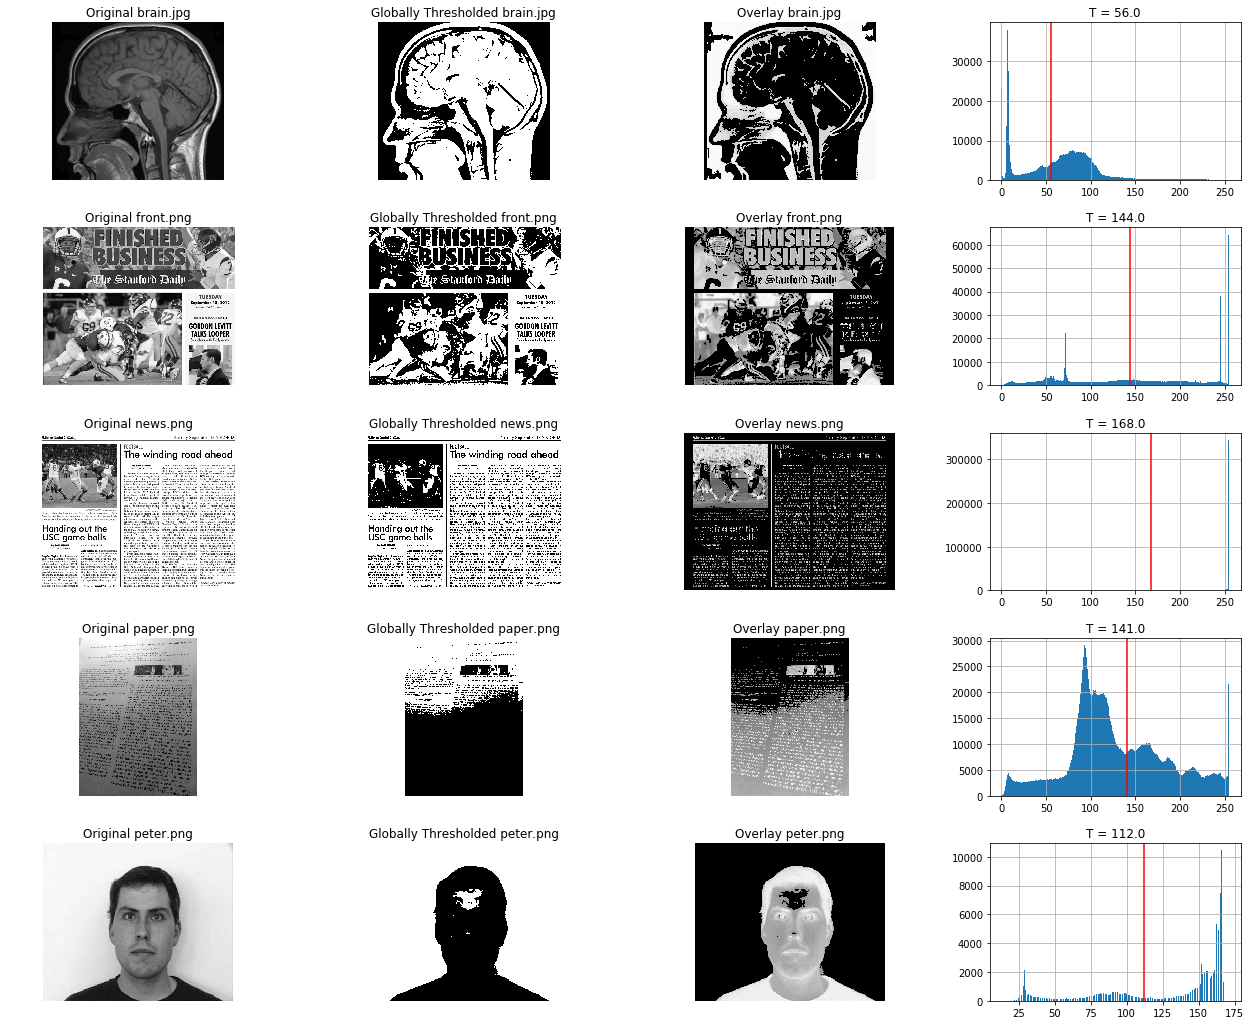

In [23]:
fig, axs = plt.subplots(len(threshs), 4, figsize=(22,18))
for i, ((level, thresh), image, name) in enumerate(zip(threshs, images, images_names)):
    axs[i, 0].imshow(image, 'gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f"Original {name}")
    axs[i, 1].imshow(thresh, 'gray')
    axs[i, 1].axis('off')
    axs[i, 1].set_title(f"Globally Thresholded {name}")
    axs[i, 2].imshow((255 - thresh) * image, 'gray')
    axs[i, 2].axis('off')
    axs[i, 2].set_title(f"Overlay {name}")
    df = pd.DataFrame(image.reshape(-1))
    df.hist(bins=255, ax=axs[i, 3])
    axs[i, 3].axvline(x=level, color='red')
    axs[i, 3].set_title(f"T = {level}")